In [5]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connexion à la BDD locale 
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  
    database="banque" 
)

# Lire la vue dans un DataFrame
query = "SELECT * FROM vue_clients_comptes_transactions"
df = pd.read_sql(query, cnx)

# Nombre total de valeurs manquantes par colonne
df.isnull().sum()

#plt.figure(figsize=(10, 5))
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.title("Valeurs manquantes dans le DataFrame")
#plt.show()

# Read les 5 premières lignes
df.head(10)


C:\Users\HP\AppData\Local\Temp\ipykernel_22156\976140890.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


,id_client,nom,prenom,date_naissance,province,date_creation_compte,id_compte,type_compte,solde_initial,date_ouverture,id_transaction,date_transaction,montant,type_transaction,description
0,1,Lefebvre,Marie,1985-04-12,Québec,2020-01-10,1,courant,1200.0,2021-01-01,1,2025-06-01,250.53,debit,Paiement facture
1,1,Lefebvre,Marie,1985-04-12,Québec,2020-01-10,1,courant,1200.0,2021-01-01,2,2025-06-10,1750.00,credit,Salaire
2,1,Lefebvre,Marie,1985-04-12,Québec,2020-01-10,2,epargne,3000.0,2021-01-02,3,2025-06-02,300.00,debit,Achat en ligne
3,1,Lefebvre,Marie,1985-04-12,Québec,2020-01-10,2,epargne,3000.0,2021-01-02,4,2025-06-15,500.00,credit,Virement reçu
4,2,Gagnon,Luc,1979-09-23,Québec,2019-07-15,3,courant,1300.0,2021-01-03,5,2025-06-01,2500.02,debit,Paiement facture
5,2,Gagnon,Luc,1979-09-23,Québec,2019-07-15,3,courant,1300.0,2021-01-03,6,2025-06-10,170.00,credit,Salaire
6,2,Gagnon,Luc,1979-09-23,Québec,2019-07-15,4,epargne,3200.0,2021-01-04,7,2025-06-02,3040.00,debit,Achat en ligne
7,2,Gagnon,Luc,1979-09-23,Québec,2019-07-15,4,epargne,3200.0,2021-01-04,8,2025-06-15,510.00,credit,Virement reçu
8,3,Roy,Sophie,1990-12-05,Ontario,2021-03-20,5,epargne,1400.0,2021-01-05,9,2024-01-17,3548.00,debit,Paiement facture
9,3,Roy,Sophie,1990-12-05,Ontario,2021-03-20,5,epargne,1400.0,2021-01-05,10,2024-01-03,7857.74,credit,Salaire


In [12]:
# Aperçu statistique
df.describe(include='all')

# Aperçu du type de données
df.dtypes


id_client                 int64
nom                      object
prenom                   object
date_naissance           object
province                 object
date_creation_compte     object
id_compte                 int64
type_compte              object
solde_initial           float64
date_ouverture           object
id_transaction            int64
date_transaction         object
montant                 float64
type_transaction         object
description              object
dtype: object

In [13]:
# Delete les lignes avec des valeurs nulles (si peu nombreuses)
df.dropna(inplace=True)

# Remplir avec une valeur par défaut (exemple : 0 ou "Inconnu")
# df['province'].fillna("Inconnu", inplace=True)


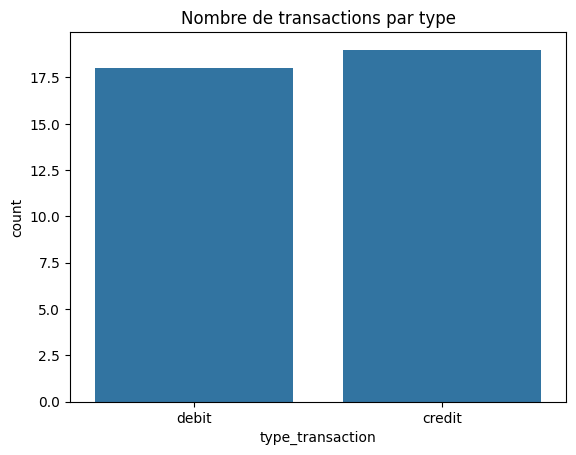

In [14]:
sns.countplot(data=df, x='type_transaction')
plt.title("Nombre de transactions par type")
plt.show()


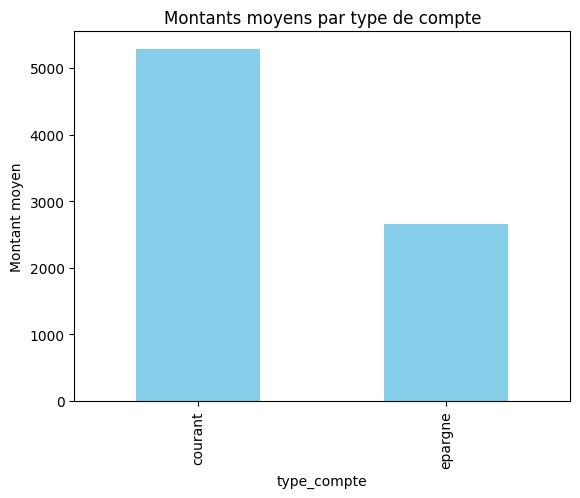

In [15]:
df.groupby('type_compte')['montant'].mean().plot(kind='bar', color='skyblue')
plt.ylabel("Montant moyen")
plt.title("Montants moyens par type de compte")
plt.show()


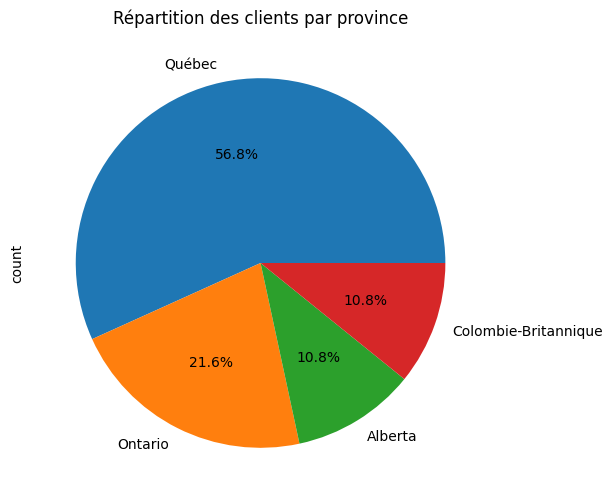

In [16]:
df['province'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Répartition des clients par province")
plt.show()


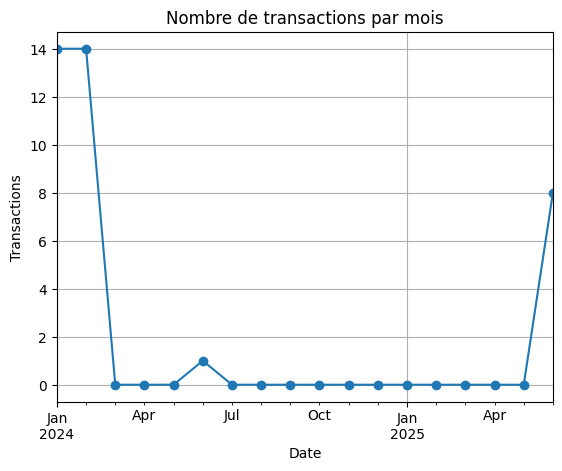

In [19]:
df['date_transaction'] = pd.to_datetime(df['date_transaction'])
transactions_par_mois = df.set_index('date_transaction').resample('ME')['id_transaction'].count()

transactions_par_mois.plot(kind='line', marker='o')
plt.title("Nombre de transactions par mois")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.grid()
plt.show()


In [20]:
df.to_csv("C:/Users/HP/Downloads/clients_clean.csv", index=False)